<a href="https://colab.research.google.com/github/phCaldas08/AppCursosFiap/blob/master/Atividade_MNIST_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade
## Classificação de Dígitos com kNN

Nesta atividade, o objetivo é complementar o notebook para executar o classificador kNN para a classificação de dígitos do dataset MNIST.

Para tanto, precisamos baixar os arquivos de treinamento e de teste do dataset,
além de instalar o pacote `python-mnist` que carrega esses arquivos 

![Exemplos de dígitos do MNIST](https://static.imasters.com.br/wp-content/uploads/2016/08/mnist.png)

## 1 - Gera a matriz de dados de entradas e o vetor de classes alvo para treinamento

Cada linha da matriz de entradas (atributos) contém os pixels da  imagem.

Cada posição do array de rótulos (labels) contém a classe alvo da imgem.

No caso deste dataset, as imagens de trenamento e de teste já estão separadas, e vamos adotar a separação sugerida pelo autor da base de dados.

In [2]:
import time
from keras.datasets import mnist

t0 = time.time()

(entradas_treino, classes_treino), (entradas_teste, classes_teste) = mnist.load_data()

print(f"Tempo para carregamento dos dados: {time.time() - t0}")

print(f"Dimensoes da matriz de treinamento: {entradas_treino.shape}")
print(f"Dimensoes da matriz de teste: {entradas_teste.shape}")

11501568/11490434 [==============================] - 0s 0us/step
Tempo para carregamento dos dados: 0.5374765396118164
Dimensoes da matriz de treinamento: (60000, 28, 28)
Dimensoes da matriz de teste: (10000, 28, 28)


In [3]:
shape_treino = (60000, 28 * 28)
shape_teste = (10000, 28 * 28)

entradas_treino = entradas_treino.reshape(shape_treino)
entradas_teste = entradas_teste.reshape(shape_teste)

print(f"Novas dimensoes da matriz de treinamento: {entradas_treino.shape}")
print(f"Novas dimensoes da matriz de teste: {entradas_teste.shape}")

Novas dimensoes da matriz de treinamento: (60000, 784)
Novas dimensoes da matriz de teste: (10000, 784)


In [4]:
import time
import numpy as np

#Transformando em array do numpy
entradas_treino = np.array(entradas_treino)
classes_treino = np.array(classes_treino)
entradas_teste = np.array(entradas_teste)
classes_teste = np.array(classes_teste)

dados_reduzidos = False

print("Dimensões da matriz dos dados de treinamento: ", entradas_treino.shape)
print("Dimensões da matriz dos dados de teste: ", entradas_teste.shape)


Tempo para carregamento das imagens: 1362.5705573558807s
Dimensões da matriz dos dados de treinamento:  (60000, 784)
Dimensões da matriz dos dados de teste:  (10000, 784)


### 1.1 Visualizção de uma imagem

Neste dataset cada imagem está armazenada como uma linha da matriz de entrada.
Para visualizar a imagem que está na linha `i` da matriz, temos que convertê-la novamente em uma matriz quadrada, e usar a biblioteca `matplotlib`


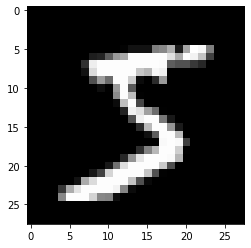

In [5]:
# Função que visualiza a linha lin da matriz
import matplotlib.pyplot as plt
import math
def visualiza_linha_mnist(matriz, lin):
  size = int(math.sqrt(matriz.shape[1]))
  img = np.reshape(matriz[lin], (size, size))
  plt.imshow(img, cmap="gray")
  
# Visualização da linha 0
visualiza_linha_mnist(entradas_treino, 0)
plt.show()

## Início da aividade
A partir daqui as matrizes `entradas_treino`, `classes_treino`, `entradas_teste` e `classes_teste` devem ser usadas para treinar, executar e avaliar o classificador KNN. Baseie-se no notebook `knn.ipynb`

Se a execução estiver demorando muito, não se preocupe, você deve estar no caminho certo. Anote sua pontuação!

## 2 - Instanciando o classificador kNN
Usando `k` vizinhos mais próximos

In [10]:
from sklearn.neighbors import KNeighborsClassifier

t0 = time.time()

k = 3


#Normalizacao
entradas_treino_norm = entradas_treino.astype(float) / 255
entradas_teste_norm = entradas_teste.astype(float) / 255

#Reducao da dimensionalidade
from sklearn.decomposition import PCA

pca = PCA(0.85)
entradas_treino_pca = pca.fit_transform(entradas_treino_norm)
#Para o de testes usar o treinado pelo treino
entradas_teste_pca = pca.transform(entradas_teste_norm)

print(f"Dimensoes das novas entradas de treinamento: {entradas_treino_pca.shape}")
print(f"Dimensoes das novas entradas de teste: {entradas_treino_pca.shape}")

Dimensoes das novas entradas de treinamento: (60000, 59)
Dimensoes das novas entradas de teste: (60000, 59)


## 3 - Treinando o classificador com as amostras de treinamento

In [11]:
modelo = KNeighborsClassifier(n_neighbors=k)
modelo.fit(entradas_treino_pca, classes_treino)

print(f"Tempo para treinamento: {time.time() - t0}")

Tempo para treinamento: 53.40411591529846


## 4 - Executando o classificador, guardando as classes obtidas

In [12]:
t0 = time.time()

classes_encontradas = modelo.predict(entradas_teste_pca)
print(f"Tempo para executar o classificador: {time.time() - t0}")

Tempo para executar o classificador: 56.09413266181946


## 5 - Cálculo da acuráciacomparando os resultados esperados e obtidos

In [13]:
from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)

print(f"Acerto médio de classificacão: {acertos}")

Acerto médio de classificacão: 0.9752
